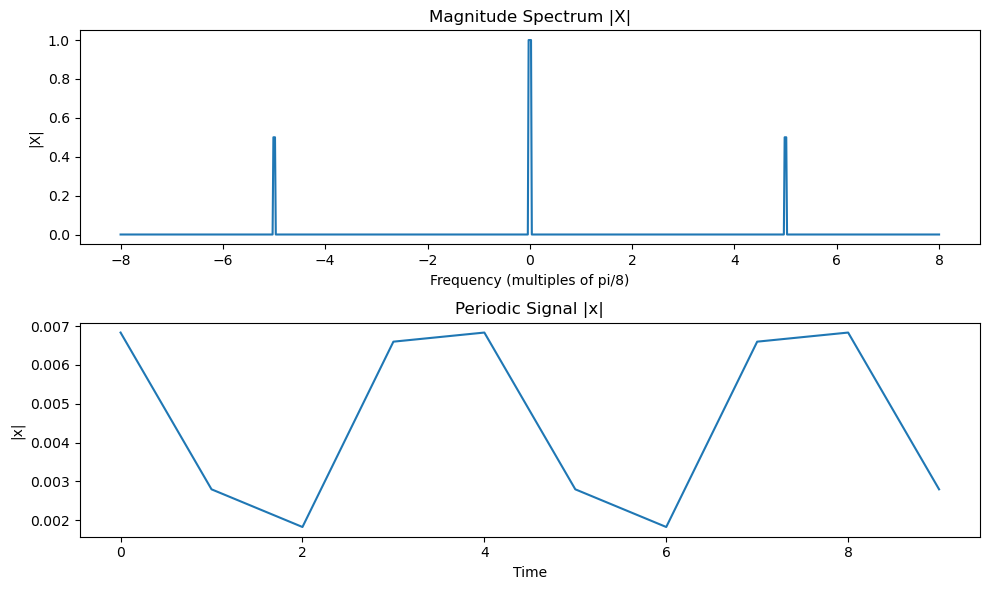

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

N = 1024  # Number of samples
n = np.arange(N)  # Discrete time index
omega = np.linspace(-np.pi, np.pi, N)  # Frequency range
X_mag = np.zeros(N)  # Magnitude spectrum

# Set the magnitudes at the specified frequencies
X_mag[np.abs(omega + 5 * np.pi / 8) < 0.01] = 0.5
X_mag[np.abs(omega - 5 * np.pi / 8) < 0.01] = 0.5
X_mag[np.abs(omega) < 0.01] = 1.0

X = X_mag * np.exp(1j * np.angle(X_mag))  # Reconstruct the complex spectrum

# Determine the period of the continuous-time signal
T_c = 2 * np.pi / np.abs(5 * np.pi / 8)  # Period in continuous-time
T = int(np.ceil(T_c))  # Period in discrete-time

# Generate a single period of the continuous-time signal
t = np.linspace(0, T_c, T, endpoint=False)  # Time values for one period
x_periodic = np.real(ifft(X))[:T]

# Replicate the single period to cover all the desired samples
periods = N // T
x = np.tile(x_periodic, periods)

# Plotting range for x[n]
plot_range = 10

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(omega / (np.pi / 8), X_mag)
plt.title('Magnitude Spectrum |X|')
plt.xlabel('Frequency (multiples of pi/8)')
plt.ylabel('|X|')

plt.subplot(2, 1, 2)
plt.plot(n[:plot_range], np.abs(x[:plot_range]))
plt.title('Periodic Signal |x|')
plt.xlabel('Time')
plt.ylabel('|x|')

plt.tight_layout()
plt.show()


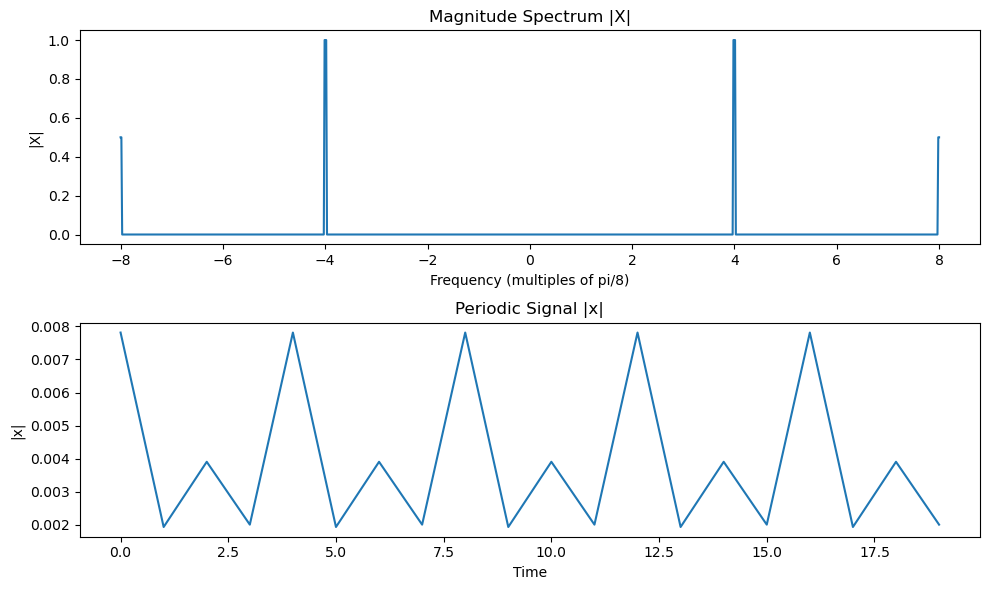

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

N = 1024  # Number of samples
n = np.arange(N)  # Discrete time index
omega = np.linspace(-np.pi, np.pi, N)  # Frequency range
X_mag = np.zeros(N)  # Magnitude spectrum

# Set the magnitudes at the specified frequencies
X_mag[np.abs(omega + np.pi) < 0.01] = 0.5
X_mag[np.abs(omega - np.pi) < 0.01] = 0.5
X_mag[np.abs(omega + np.pi/2) < 0.01] = 1.0
X_mag[np.abs(omega - np.pi/2) < 0.01] = 1.0

X = X_mag * np.exp(1j * np.angle(X_mag))  # Reconstruct the complex spectrum

# Determine the period of the continuous-time signal
T_c = 2 * np.pi / np.abs(np.pi/2)  # Period in continuous-time
T = int(np.ceil(T_c))  # Period in discrete-time

# Generate a single period of the continuous-time signal
t = np.linspace(0, T_c, T, endpoint=False)  # Time values for one period
x_periodic = np.real(ifft(X))[:T]

# Replicate the single period to cover all the desired samples
periods = N // T
x = np.tile(x_periodic, periods)

# Plotting range for x[n]
plot_range = 20

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(omega / (np.pi / 8), X_mag)
plt.title('Magnitude Spectrum |X|')
plt.xlabel('Frequency (multiples of pi/8)')
plt.ylabel('|X|')

plt.subplot(2, 1, 2)
plt.plot(n[:plot_range], np.abs(x[:plot_range]))
plt.title('Periodic Signal |x|')
plt.xlabel('Time')
plt.ylabel('|x|')

plt.tight_layout()
plt.show()


In [10]:
import sympy as sp

M = 7  # Start index
L = 20  # End index

# Define the symbolic variables
n, k = sp.symbols('n k')

# Define the signal x[n]
x = sp.Piecewise((1, n < M), (0, True))

# Calculate the DFT X[k]
X = sp.summation(x * sp.exp(-2*sp.pi*sp.I*k*n/L), (n, 0, L-1))

# Simplify the result
X = sp.simplify(X)

# Print the simplified expression for X[k]
print(X)


1 + exp(-I*pi*k/2) + exp(-I*pi*k/5) + exp(-2*I*pi*k/5) + exp(-3*I*pi*k/5) + exp(-I*pi*k/10) + exp(-3*I*pi*k/10)


C:\Users\jorda\AppData\Local\Temp\ipykernel_20000\510875018.py:17: RuntimeWarning: invalid value encountered in divide
  X_formula = (1 / np.sqrt(L)) * (1 - np.exp(-2 * np.pi * 1j * k * M / L)) / (1 - np.exp(-2 * np.pi * 1j * k / L))
C:\Users\jorda\AppData\Local\Temp\ipykernel_20000\510875018.py:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, np.abs(X), linefmt='b-', markerfmt='bo', basefmt='b-', use_line_collection=True, label='DFT(x[n])')
C:\Users\jorda\AppData\Local\Temp\ipykernel_20000\510875018.py:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.st

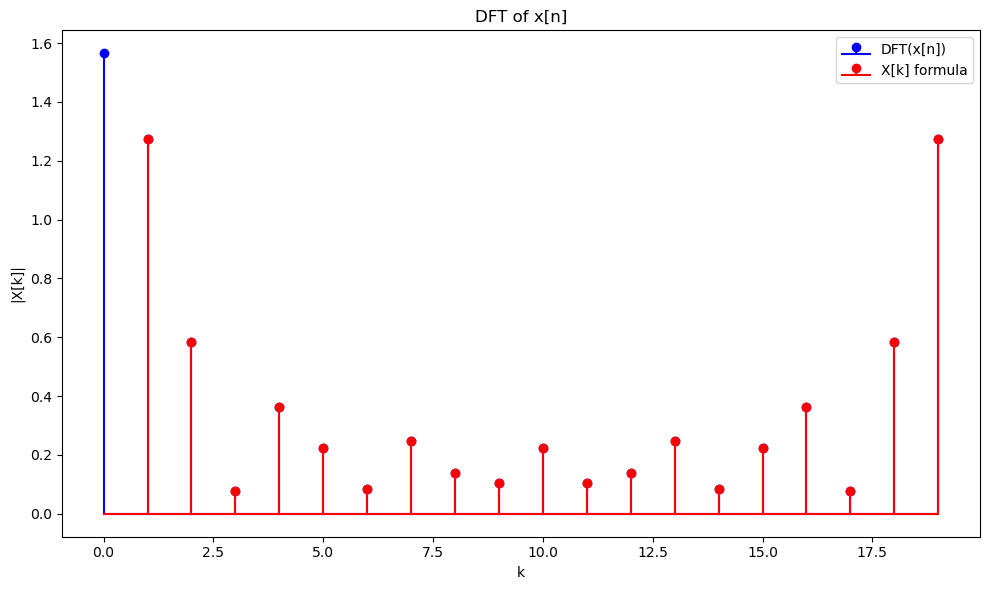

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

M = 7  # Start index
L = 20  # End index

# Generate x[n]
n = np.arange(L)
x = np.where((n >= 0) & (n < M), 1, 0)

# Compute DFT of x[n]
X = fft(x) / np.sqrt(L)

# Compute X[k] using the derived formula
k = np.arange(L)
X_formula = (1 / np.sqrt(L)) * (1 - np.exp(-2 * np.pi * 1j * k * M / L)) / (1 - np.exp(-2 * np.pi * 1j * k / L))

# Plotting the DFT of x[n]
plt.figure(figsize=(10, 6))
plt.stem(k, np.abs(X), linefmt='b-', markerfmt='bo', basefmt='b-', use_line_collection=True, label='DFT(x[n])')
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('DFT of x[n]')

# Plotting the X[k] formula
plt.stem(k, np.abs(X_formula), linefmt='r-', markerfmt='ro', basefmt='r-', use_line_collection=True, label='X[k] formula')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\jorda\AppData\Local\Temp\ipykernel_20000\2929928311.py:17: RuntimeWarning: invalid value encountered in divide
  X_formula = (1 / np.sqrt(L)) * (1 - np.exp(-2 * np.pi * 1j * k * M / L)) / (1 - np.exp(-2 * np.pi * 1j * k / L))
C:\Users\jorda\AppData\Local\Temp\ipykernel_20000\2929928311.py:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, np.abs(X), linefmt='b-', markerfmt='bo', basefmt='b-', use_line_collection=True)
C:\Users\jorda\AppData\Local\Temp\ipykernel_20000\2929928311.py:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, np.abs(X_f

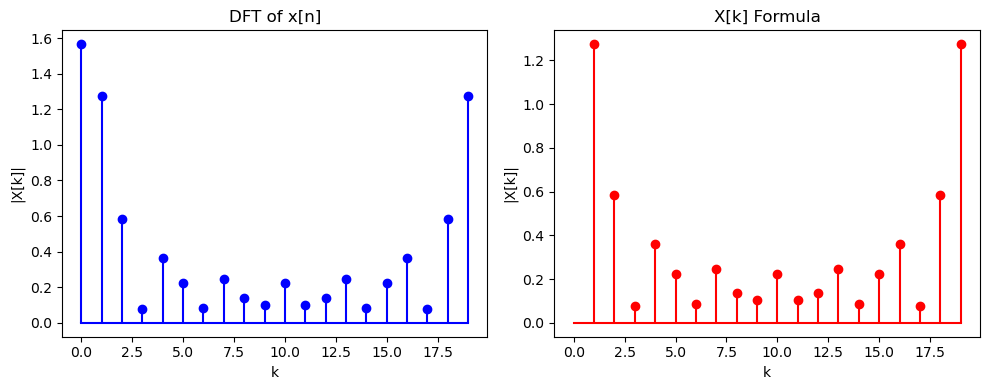

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

M = 7  # Start index
L = 20  # End index

# Generate x[n]
n = np.arange(L)
x = np.where((n >= 0) & (n < M), 1, 0)

# Compute DFT of x[n]
X = fft(x) / np.sqrt(L)

# Compute X[k] using the derived formula
k = np.arange(L)
X_formula = (1 / np.sqrt(L)) * (1 - np.exp(-2 * np.pi * 1j * k * M / L)) / (1 - np.exp(-2 * np.pi * 1j * k / L))

# Plotting the DFT of x[n]
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(k, np.abs(X), linefmt='b-', markerfmt='bo', basefmt='b-', use_line_collection=True)
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('DFT of x[n]')

# Plotting the X[k] formula
plt.subplot(1, 2, 2)
plt.stem(k, np.abs(X_formula), linefmt='r-', markerfmt='ro', basefmt='r-', use_line_collection=True)
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('X[k] Formula')

plt.tight_layout()
plt.show()
